# feature reduction 

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint  
from sklearn.decomposition import PCA

(17023, 10)
(17023, 5)
            PC1       PC2       PC3       PC4       PC5
0     -0.344156 -0.333518  0.251229 -0.533493  0.457623
1     -0.228298 -0.560275  0.224966 -0.606860  0.346459
2     -0.145278 -0.615409  0.172663 -0.506833  0.371723
3     -0.005613 -0.826381  0.098636 -0.348944  0.367003
4     -0.103293 -0.858094  0.163411 -0.460812  0.320879
...         ...       ...       ...       ...       ...
17018 -0.545679 -0.645267  0.330462 -0.388973  0.480195
17019 -1.172259  0.316889  0.648917 -0.856341  0.632414
17020 -1.019909 -0.013219  0.594186 -0.802374  0.543973
17021 -1.009635  0.060788  0.542581 -0.665054  0.603131
17022 -0.989695  3.393090 -0.228164  2.331895  3.196609

[17023 rows x 5 columns]
explained_variance: [0.33080106 0.19490018 0.12373405 0.11143858 0.0907696 ]


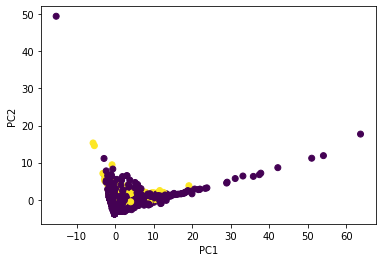

In [10]:
# dataset
dataset = pd.read_csv('cleaned data after select features.csv')
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:17000].values
y = dataset.iloc[:, 9].values
print(X.shape)
#performing preprocessing part
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
# Applying PCA function on training
# and testing set of X component
pca = PCA(n_components = 5)
X = pca.fit_transform(X)
print(X.shape)
# Convert numpy arrays to pandas DataFrame
X_df = pd.DataFrame(X, columns=['PC1', 'PC2','PC3','PC4','PC5'])
# Print the columns of X DataFrame
print(X_df)
# Print the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print('explained_variance: ' + str(explained_variance))
# Plot the transformed data first 2 columns with the highest variance
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# saving the dataframe into a csv file
X_df.to_csv('features_after_reduction.csv')